In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/hotel-booking/hotel_booking.csv


### Loading the dataset

In [2]:
#src: https://www.kaggle.com/datasets/mojtaba142/hotel-booking
df = pd.read_csv('/kaggle/input/hotel-booking/hotel_booking.csv')

In [3]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


### Exploratory Data Analysis and Data Cleaning

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [5]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


In [6]:
df.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
68924,City Hotel,1,423,2017,May,21,23,0,1,2,...,Transient,90.0,0,0,Canceled,2017-02-28,Misty Rodriguez DVM,MistyDVM@gmail.com,101-022-8584,************6351
114341,City Hotel,0,0,2017,June,25,19,1,0,2,...,Transient,128.0,0,0,Check-Out,2017-06-20,Linda Peterson,Linda.Peterson@aol.com,395-937-8542,************6474
21542,Resort Hotel,0,0,2016,February,10,29,1,2,1,...,Transient,43.0,0,1,Check-Out,2016-03-03,Darrell Carter,Darrell.Carter@yahoo.com,266-367-1324,************8565
4034,Resort Hotel,0,112,2016,February,7,12,0,2,1,...,Transient-Party,0.0,0,0,Check-Out,2016-02-14,Regina Lewis,ReginaLewis@gmail.com,434-667-9939,************3672
94661,City Hotel,0,1,2016,August,33,7,1,0,2,...,Transient,12.0,0,0,Check-Out,2016-08-08,Robert Cox,Robert.Cox@yandex.com,216-888-5589,************1961
25303,Resort Hotel,0,66,2016,June,24,11,4,6,2,...,Transient,143.0,1,1,Check-Out,2016-06-21,Jeffrey Walker,Walker_Jeffrey@mail.com,562-665-8722,************8823
110869,City Hotel,0,96,2017,May,18,1,1,1,2,...,Transient,105.0,0,2,Check-Out,2017-05-03,Paul Ross,Paul_Ross@aol.com,403-596-6968,************8060
74735,City Hotel,1,329,2015,September,37,11,2,3,2,...,Transient,90.0,0,0,Canceled,2015-02-20,Allison Kennedy,Allison_K@mail.com,518-727-8169,************5665
79269,City Hotel,0,27,2015,October,43,19,1,4,2,...,Contract,126.0,0,1,Check-Out,2015-10-24,Monica Ball,Monica.B@zoho.com,558-066-0712,************3233
78458,City Hotel,0,9,2015,October,41,7,0,3,2,...,Contract,145.0,0,0,Check-Out,2015-10-10,Zachary Wilkins,Zachary.W@zoho.com,712-985-3517,************8597


In [7]:
df.shape

(119390, 36)

In [8]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [11]:
df.describe(include = "object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461,48,6,1,28


In [12]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [13]:
df.duplicated().sum()

0

##### So, there is no duplicate value

##### Changing the datatype of the column

In [14]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [15]:
for col in df.describe(include = 'object').columns:
    print(f"{col} -> ", end="")
    print(df[col].unique())
    print('-'*92)

hotel -> ['Resort Hotel' 'City Hotel']
--------------------------------------------------------------------------------------------
arrival_date_month -> ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------------------------------------------------
meal -> ['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------------------------------------------------
country -> ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN

In [16]:
#Removing the null values as they are too less compare to size of data
df.drop(['company', 'agent'], axis = 1, inplace = True)
df.dropna(inplace = True)

In [17]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

#### Outlier Detection

In [18]:
df.adr.sort_values(ascending = False)

48515     5400.00
111403     510.00
15083      508.00
103912     451.50
13142      450.00
           ...   
11425        0.00
22970        0.00
22969        0.00
0            0.00
14969       -6.38
Name: adr, Length: 118898, dtype: float64

In [19]:
df = df[(df['adr']<5000) & (df['adr']>=0)]

#### Removing Personal information in data such as name , email, phone number, credit card

In [20]:
df.drop(['name','email','phone-number','credit_card'],axis=1 , inplace = True)

##### We have only cleaned and detected outliers in the columns which we will require

### Exploring different fields

In [21]:
df['adults'].groupby(df['hotel']).sum()

hotel
City Hotel      146796
Resort Hotel     74159
Name: adults, dtype: int64

In [22]:
df['children'].groupby(df['hotel']).sum()

hotel
City Hotel      7248.0
Resort Hotel    5142.0
Name: children, dtype: float64

In [23]:
df['babies'].groupby(df['hotel']).sum()

hotel
City Hotel      392
Resort Hotel    553
Name: babies, dtype: int64

### Analysis and Visulzations

In [24]:
cancelled_perc = df['is_canceled'].value_counts(normalize = True)
cancelled_perc

0    0.62865
1    0.37135
Name: is_canceled, dtype: float64

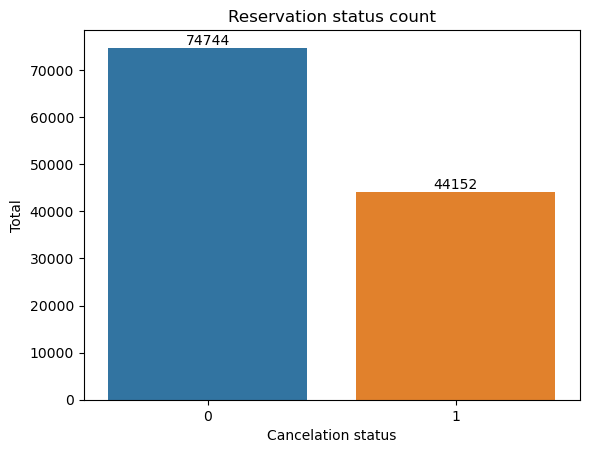

In [25]:
# plt.figure(figsize=(5,4))
# plt.title('Reservation status count')
# ax = plt.bar(['Not canceled', 'canceled'], df['is_canceled'].value_counts(), edgecolor = 'k', width = 0.7)
# plt.show()

ax = sns.countplot(x = 'is_canceled',data = df)
plt.title('Reservation status count')
plt.xlabel("Cancelation status")
plt.ylabel("Total")

for bars in ax.containers:
    ax.bar_label(bars)

The Bar Graph shows the % of reservations that are canceled and those that are alot in the specific period. It is obviosly that there are still a sighnificant number of reservations that have been not canceled. 37% from all bookings are canceled which impact on the hotel's earning

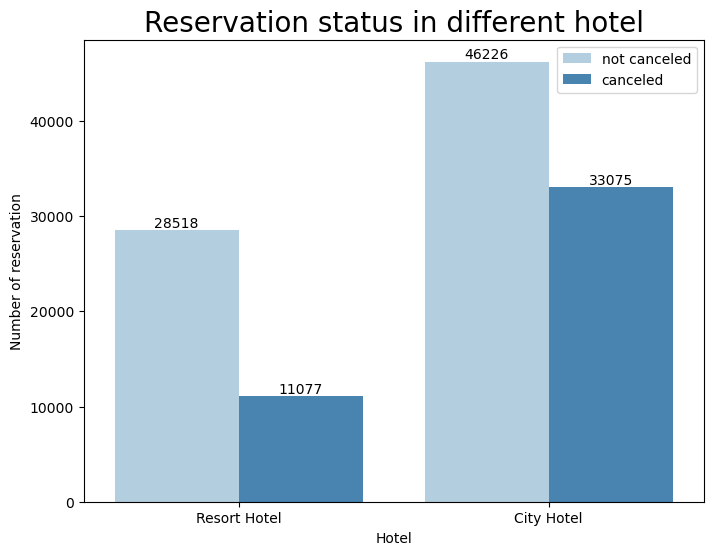

In [26]:
plt.figure(figsize= (8,6))
ax = sns.countplot(x = 'hotel', hue = 'is_canceled',data = df, palette = 'Blues')
legend_labels,_= ax. get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status in different hotel',size = 20)
plt.xlabel('Hotel')
plt.ylabel('Number of reservation')
plt.legend(['not canceled','canceled'])

for bars in ax.containers:
    ax.bar_label(bars)

As above chart is showing us the total numbers of bookings in a city hotel than resort hotel which impact resort hotel more expensive than city hotel also, in comparion the cancellation in a city hotel compared a confirmed booking is high

### Analysis Average Daily Rate in City Hotel and Resort Hotel

In [27]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

0    0.720242
1    0.279758
Name: is_canceled, dtype: float64

In [28]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

In [29]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

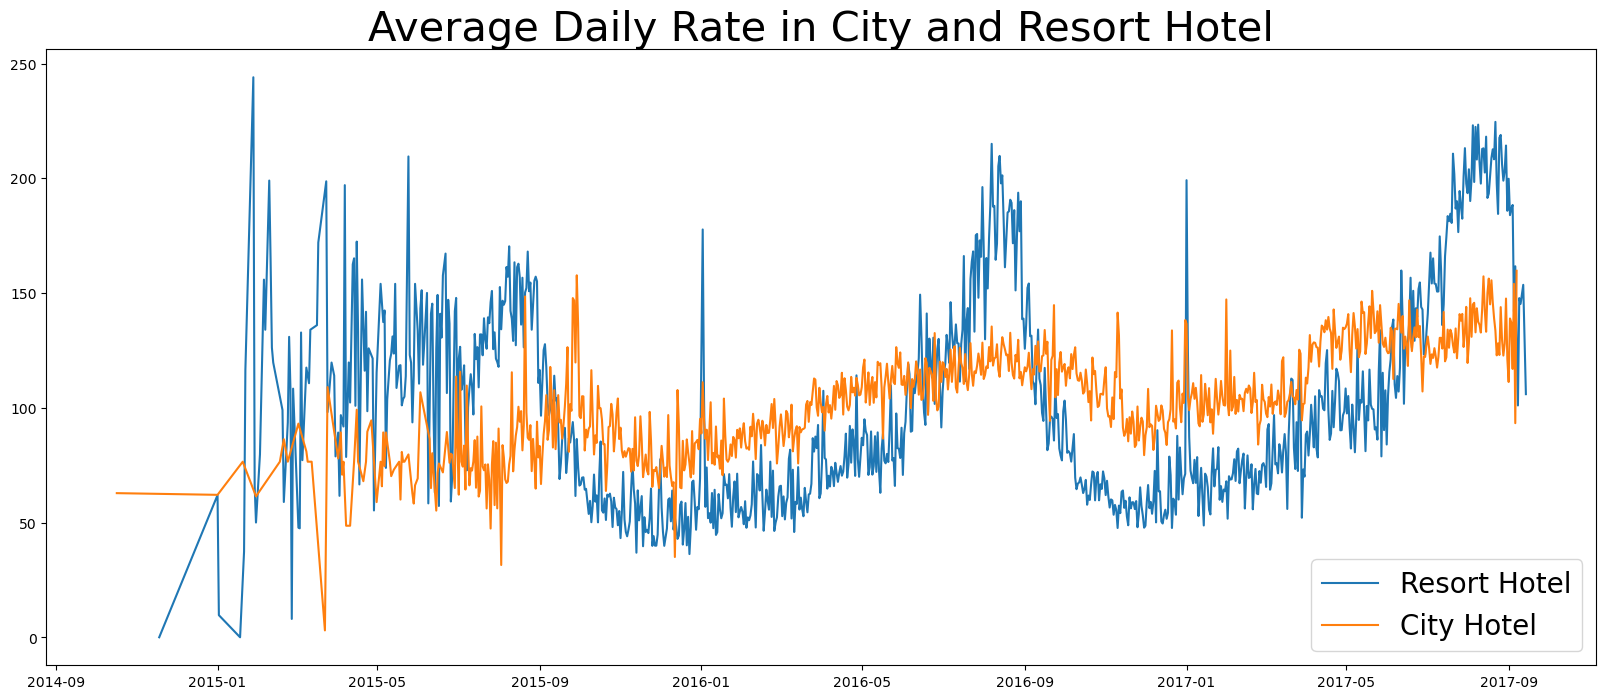

In [30]:
plt.figure(figsize= (20,8))
plt.title('Average Daily Rate in City and Resort Hotel',fontsize = 30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label ='City Hotel')
plt.legend(fontsize = 20)
plt.show()

The above line chart shows that, the city hotel "ADR" is less than resort hotel for most of days and on other days, it is even less

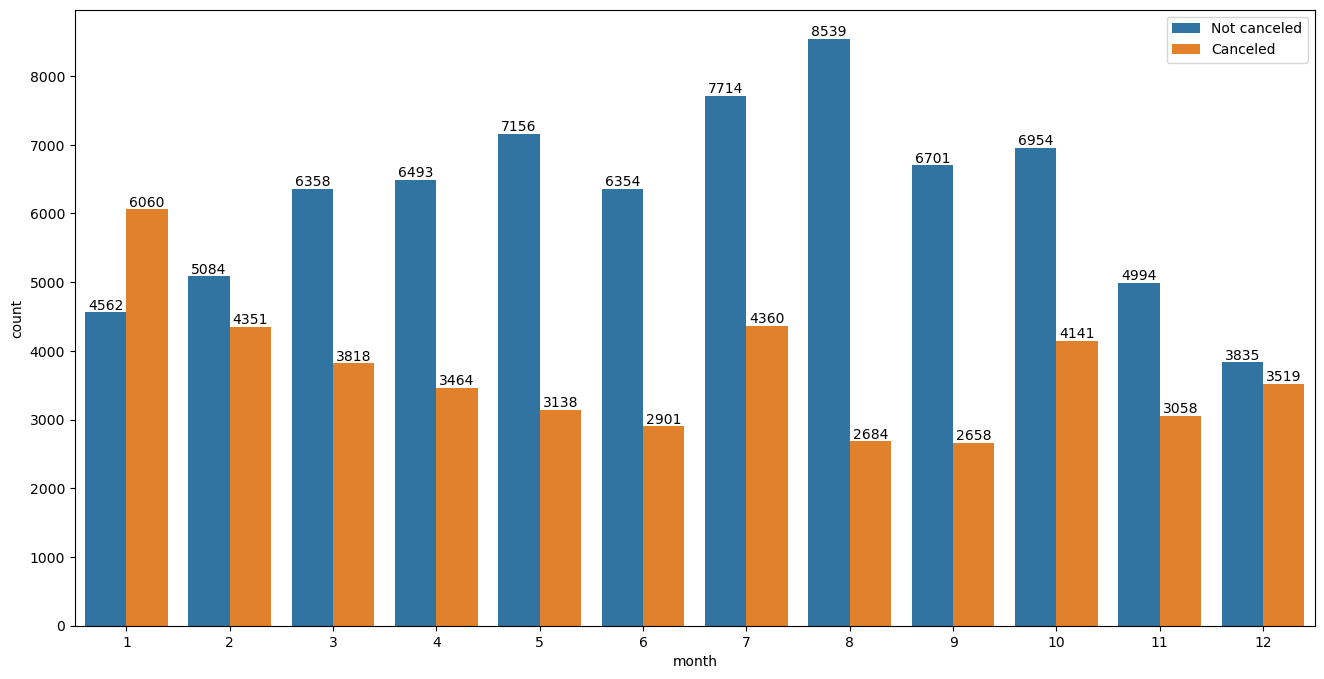

In [31]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize = (16,8))
ax = sns.countplot(x = 'month', hue = "is_canceled", data = df)
plt.legend(['Not canceled', 'Canceled'])

for bars in ax.containers:
    ax.bar_label(bars)

Highest cancellation happend in January and lowest in September and August

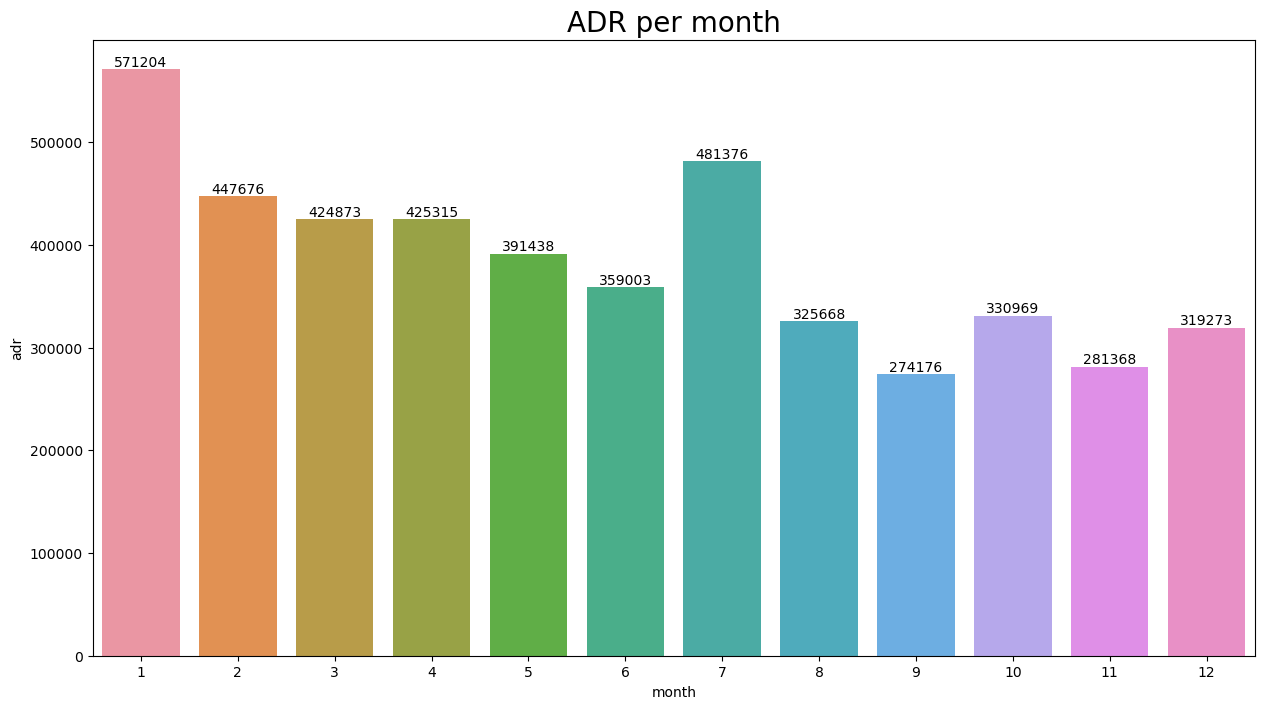

In [32]:
plt.figure(figsize = (15,8))
plt.title('ADR per month', fontsize = 20)
grouped_data = df[df['is_canceled'] == 1].groupby('month')['adr'].sum().reset_index()

ax = sns.barplot(x='month', y='adr', data=grouped_data)

for bars in ax.containers:
    ax.bar_label(bars)

EDR is higher in those months which have higher cancellation

In [33]:
cancelled_data = df[df['is_canceled']== 1]
top_10_country = cancelled_data['country'].value_counts()[:10]
top_10_country

PRT    27514
GBR     2453
ESP     2177
FRA     1934
ITA     1333
DEU     1218
IRL      832
BRA      830
USA      501
BEL      474
Name: country, dtype: int64

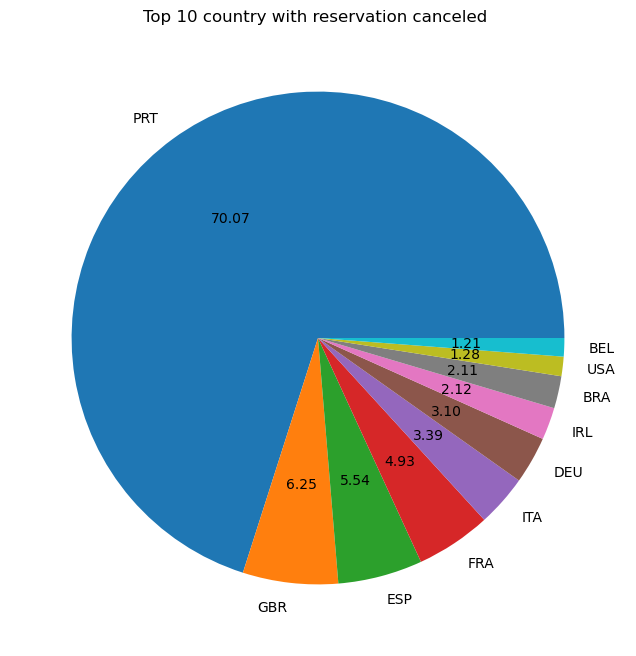

In [34]:
plt.figure(figsize = (10, 8))
plt.title('Top 10 country with reservation canceled ')
plt.pie(top_10_country, autopct = '%.2f' , labels = top_10_country.index)
plt.show()

Pie chart on the above shows us portugal is the highest country in canceling reservations

#### Let's check the area from where guests are visiting the hotels and making reservations. Is it coming from Direct or Groups, Online or Offline TravelAgents?

In [35]:
df['market_segment'].value_counts()

Online TA        56402
Offline TA/TO    24159
Groups           19805
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [36]:
round(df['market_segment'].value_counts(normalize=True)*100,2)

Online TA        47.44
Offline TA/TO    20.32
Groups           16.66
Direct           10.47
Corporate         4.30
Complementary     0.62
Aviation          0.20
Name: market_segment, dtype: float64

In [37]:
round(cancelled_data['market_segment'].value_counts(normalize=True)*100,2)

Online TA        46.97
Groups           27.40
Offline TA/TO    18.75
Direct            4.35
Corporate         2.22
Complementary     0.20
Aviation          0.12
Name: market_segment, dtype: float64

Around 46% of the clients come from online travel agencies,whereas 27% come from groups. Only 4% of clients book hotels directly by visiting them and making reservations

#### What is their preferred meal plan?

In [38]:
meals = df['meal'].value_counts()
meals

BB           91861
HB           14434
SC           10638
Undefined     1165
FB             798
Name: meal, dtype: int64

<Axes: >

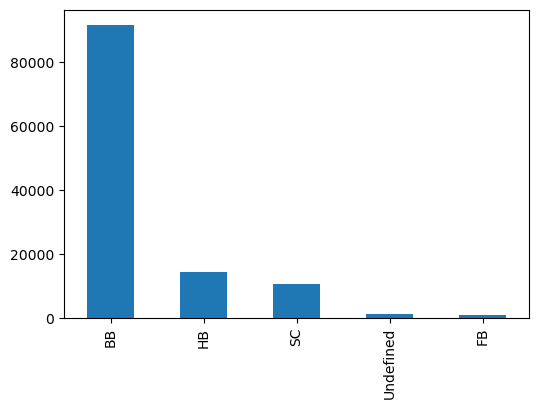

In [39]:
meals.plot(kind='bar',figsize=(6,4))

Refering to the above analysis BB is the prefered meal plan and it's repeated by 91861 times

In [40]:
df['is_canceled'] = df['is_canceled'].astype(int)

# Group by 'country' and count the number of non-canceled bookings
country_visitors = df[df['is_canceled'] == 0].groupby(['country']).size().reset_index(name='count')

fig = px.choropleth(country_visitors,
                    locations="country",
                    color="count",
                    hover_name="country",
                    color_continuous_scale="dense",
                    projection='orthographic',
                    title="Nationality of visitors")
fig.show()

Most of customers came from europe and it's make sense hotels in spain and portugal

Suggestions
* In order to prevent cancellations of reservations, hotels could work on their pricing strategies and try to lower the rates for specific hotels based on locations. They can also provide some discounts the consumers.
* As the ratio of the cancelation is high depend on the despoite type so, we suggest to change the policy for bookings
* In the month of January, hotels can start campaigns or marketing with a reasonable amount to increase their revenue as the cancelation i the highest in this month
* They can also increase the quality of their hotels and their services mainly in Portugal to reduce the cancellation rate.
* They can charge minimum amount of booking cancellacancellation
* Also hotels can provide a coupons for previous customer to discount on next visit